<a href="https://colab.research.google.com/github/ariahosseini/InterfacePhononsToolkit/blob/master/MC_RayTracing_HCACF_Thermalization_Parallel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ray tracing code**
---
A collection of functions used in the variouse photon and phonon ray tracing models


# Setup

## Modules

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy import integrate

## Plotting Functions

In [ ]:
# Define plotting functions

plt.rc("font", size = 18, family = 'sans-serif')
plt.rcParams["figure.figsize"] = (6, 5)
plt.rcParams['animation.html'] = 'html5'

def quickplot(x,y,xlab="x", ylab="y", plotlab="", plotstyle='-o', alpha=1,
              savefile=False, filename="plot.png",errorbar= False, yerrors=[], **kwargs):
    """
       Display a formatted plot of a single set of data

       input: x = x values
              y = y values
              e = uncertainty values
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x,y,plotstyle,alpha=alpha)
    ax.set(title=plotlab,xlabel=xlab, ylabel=ylab)
    # for key in kwargs:
    #     print(key)
    #     print(kwargs[key])
    #     ax.set(kwargs)
    if errorbar:
        plt.errorbar(x, y, yerr=yerrors, elinewidth=None, capsize=None)
    if savefile:
        fig.savefig(filename,bbox_inches='tight',dpi=300)
    plt.rcParams['figure.dpi'] = 100
    plt.show()


def quickploterr(x,y,e,col='',xlab="x",ylab="y",plotlab="",alpha=0.3,**kwargs):
    """
       Display a formatted error bar plot of a single set of data

       input: x = x values
              y = y values
              e = uncertainty values
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x,y,'-'+col)
    ax.fill_between(x,y-e,y+e,alpha=alpha)
    ax.set(title=plotlab,xlabel=xlab, ylabel=ylab)

    #plt.savefig('test.pdf')
    plt.rcParams['figure.dpi'] = 100
    plt.show()


def quickmultiplot(data, xlab="x", ylab="y", plotlab="", plotstyle=["-"], legends=[], alpha=1,
                   savefile=False, filename="plot.png", errorbar= False, yerrors=[],**kwargs):
    """
       Display a formatted plot of multiple sets of data

       input: data = List of data sets for plotting with each data set composed
                     of 2 equal length vectors containing the x and y data
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)
    #plotstyle = ['-','o-']
    i = 0
    for x,y in data:
        if len(plotstyle)==1:
          ax.plot(x,y,plotstyle[0],alpha=alpha)
        else:
          if len(legends)>0:
            print('add legends')
            ax.plot(x,y,plotstyle[i],alpha=alpha[i],label=legends[i])
          else:
            ax.plot(x,y,plotstyle[i],alpha=alpha)
        ax.set(title=plotlab,xlabel=xlab, ylabel=ylab)
        if errorbar:
          plt.errorbar(x, y, yerr=yerrors, elinewidth=None, capsize=None)
        i+=1

    if len(legends)>0:
        plt.legend()
    if savefile:
        fig.savefig(filename,bbox_inches='tight',dpi=300)
    plt.rcParams['figure.dpi'] = 100
    plt.show()


def quickmultierrplot(data,xlab="x",ylab="y",plotlab="",plotstyle="-",alpha=0.3,**kwargs):
    """
       Display a formatted error bar plot of multiple sets of data

       input: data = List of data sets for plotting with each data set composed
                     of 3 equal length vectors containing the x, y and uncertainty data
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for x,y,e in data:
        ax.plot(x,y,plotstyle)
        ax.fill_between(x,y-e,y+e,alpha=alpha)
        ax.set(title=plotlab,xlabel=xlab, ylabel=ylab)
    plt.rcParams['figure.dpi'] = 100
    plt.show()


def quickGPplot(train,true,fit,xlab="x", ylab="y",plt_title=None,savefile=False,filename="plot.png", **kwargs):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(true[0][:,0],true[1][:,0], 'k-')
    ax.plot(train[0][:,0],train[1][:,0], 'ro')
    ax.plot(fit[0][:,0],fit[1][:,0], '-')
    ax.fill_between(fit[0][:,0], fit[1][:,0]+fit[2], fit[1][:,0]-fit[2],
                     alpha=0.2)
    ax.set(xlabel=xlab,ylabel=ylab,title=plt_title)
    plt.rcParams['figure.dpi'] = 100
    if savefile:
        fig.savefig(filename,bbox_inches='tight',dpi=300)
    plt.show()

def quickGPplot_multicol(traine,trainf,true,fit,xlab="x", ylab="y",plt_title=None,savefile=False,filename="plot.png", **kwargs):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(true[0][:,0],true[1][:,0], 'k-')
    ax.plot(traine[0][:,0],traine[1][:,0], 'ro')
    ax.plot(trainf[0][:,0],trainf[1][:,0], 'go')
    ax.plot(fit[0][:,0],fit[1][:,0], '-')
    ax.fill_between(fit[0][:,0], fit[1][:,0]+fit[2], fit[1][:,0]-fit[2],
                     alpha=0.2)
    ax.set(xlabel=xlab,ylabel=ylab,title=plt_title)
    plt.rcParams['figure.dpi'] = 100
    if savefile:
        fig.savefig(filename,bbox_inches='tight',dpi=300)
    plt.show()

Define functions for looking at the distribution of data

In [ ]:
def Plot_Data_Distribution(data):
    # make a probability distribution function of the data
    from scipy.stats.kde import gaussian_kde
    from numpy import linspace
    # this create the kernel, given an array it will estimate the probability over that values
    kde = gaussian_kde(data)
    # these are the values over wich your kernel will be evaluated
    dist_space = linspace(min(data), max(data), 100)
    # plot the results
    quickplot(dist_space,kde(dist_space),xlab="Data value",ylab="Probability",plotstyle='-')

def Plot_Data_M_Distribution(datamatrix):
    # make a probability distribution function of the data
    from scipy.stats.kde import gaussian_kde
    from numpy import linspace
    # this create the kernel, given an array it will estimate the probability over that values
    plotdata = []
    for data in np.transpose(datamatrix):
        dist_space = linspace(min(data), max(data), 100)
        kde = gaussian_kde(data)
        plotdata.append([dist_space,kde(dist_space)])
    quickmultiplot(plotdata,xlab="Data value",ylab="Probability",plotstyle='-')


# System parameters

Define the propabilities of each outcome when a ray hits a wall. There are three properties assosiated with a wall:


*   The probability of transmission
    p_abs   = 0.8  # Probability that a ray is absorbed by a wall if it is not transmitted
*   The Specularity: the probability that if the ray is reflected it does so speculalrly

In [ ]:
d = {'a':1, 'b':2}
for key,val in d.items():
    exec(key + '=val')
print(b)


def apply_dict(varialble_dict):
    from types import SimpleNamespace
    n = SimpleNamespace(**varialble_dict)
    print(n.f)
    print(locals())
    #for key,val in varialble_dict.items():
    #    exec(key + '=val')
    #globals().update(varialble_dict)

    for key,val in varialble_dict.items(): exec(key + '=val')
    #for key,val in varialble_dict.items(): eval(key + '=val')
    #locals().update(varialble_dict)
    print(locals())
    a = 5
    print(locals())
    print(a)
    print(locals()['a'])
    print(locals()['f'])
    #print(locals.f)

p = {'c':1, 'f':17}
apply_dict(p)
print(p)
#print(c)


2
17
{'varialble_dict': {'c': 1, 'f': 17}, 'SimpleNamespace': <class 'types.SimpleNamespace'>, 'n': namespace(c=1, f=17)}
{'varialble_dict': {'c': 1, 'f': 17}, 'SimpleNamespace': <class 'types.SimpleNamespace'>, 'n': namespace(c=1, f=17), 'key': 'f', 'val': 17, 'c': 1, 'f': 17}
{'varialble_dict': {'c': 1, 'f': 17}, 'SimpleNamespace': <class 'types.SimpleNamespace'>, 'n': namespace(c=1, f=17), 'key': 'f', 'val': 17, 'c': 1, 'f': 17, 'a': 5}
5
5
17
{'c': 1, 'f': 17}


In [ ]:
# Model parameters
model_parameters = {# Material
                    'tau00' :  1.0,       # mean lifetime
                    'v_g'   : 10.0,       # Group velocity
                    # Geometry
                    'd'     : 10.000,     # x spacing between pores
                    'L'     :  2.4,       # y spacing between pores
                    'alpha' :  0.75,      # Pore diameter spacing ratio
                    # Scattering behavior
                    'thermalization_probability' : 0.005,  # Probability that phonons thermalize when hitting a pore
                    'specularity_probability'    : 1.0}    # Probability that phonons scater specularly


sim_parameters = {# Simulation parameters
                  't_max'          : 20,       # maximum correlation time (as a factor of tau00) to compute the ACF out to
                  'time_intervals' : 10001,    # time interfals
                  'nBlocks'        : 40,
                  'SamplesPerBlock': 500}


def GetCumProbs(p_tran,spec,p_abs):
    """
    Compute the list of cumulative probabilities from the tree wall properties

    Input
      p_tran  : Probability of transmission
      spec    : Specularity: the probability that if the ray is reflected it does so speculalrly
      p_abs   : Probability that a ray is absorbed by a wall if it is not transmitted

    Output
      cp_list : Cumulative probability list for transmission, absorbtion, specular
                reflection and diffuse reflection
    """
    p_absa  = (1.0-p_tran)*p_abs           # Absolute probability of absorbtion
    p_rspec = (1.0-p_tran-p_absa)*(1-spec) # Absolute probability of specular reflection
    p_rdiff = (1.0-p_tran-p_absa)*spec     # Absolute probability of diffuse reflection

    p_list  = np.array([p_tran,p_absa,p_rspec,p_rdiff])
    cp_list = np.add.accumulate([p_tran,p_absa,p_rspec,p_rdiff])
    #print(p_list)
    #print(cp_list)
    return cp_list

from types import SimpleNamespace

def set_up_parameters(model_parameters, sim_parameters,
                      pore_arrangment='aligned'):
    """
    Compute the sets on input parameters used in the simulations from a dictionar. or model
    parameters of list of cumulative probabilities from the tree wall properties
    """
    #n = SimpleNamespace(**model_parameters)
    #n.update(model_parameters)
    # # Model parameters
    # for key,val in model_parameters.items():
    #     #print(key + '=val')
    #     exec(key + '=val')
    # # Simulation parameters
    # for key,val in sim_parameters.items():
    #     exec(key + '=val')
    # locals().update(model_parameters)
    # print(tau00)
    # Model parameters
    tau00 = model_parameters['tau00'] # Trunkation time for the ACF
    v_g   = model_parameters['v_g']
    d     = model_parameters['d']
    L     = model_parameters['L']
    alpha = model_parameters['alpha']
    thermalization_probability = model_parameters['thermalization_probability']
    specularity_probability    = model_parameters['specularity_probability']
    print(v_g)
    print(d)

    # Simulation parameters
    t_max           = sim_parameters['t_max']
    time_intervals  = sim_parameters['time_intervals']
    nBlocks         = sim_parameters['nBlocks']
    SamplesPerBlock = sim_parameters['SamplesPerBlock']

    # Dependent values
    tau_max = tau00*t_max          # ACF trunkation length
    r       = alpha*L*0.5          # pore radius
    k_bulk  = tau00*(v_g**2)/3.0   # bulk thermalconductivity
    mfp     = v_g*tau00            # Average mean free path
    print(k_bulk)
    #Define the pillar parameters and walls of the cell
    co = np.array([0.0,0.0,0.0]) # Cone apex
    cm = np.identity(3)          # Cone matrix
    cm[2,2] = 0
    pillar = [co,cm,r]
    # Walls 0-3 are the cell walls, walls 5 is the cylindrical pore.
    print("Pore arrangment:",pore_arrangment)
    if pore_arrangment=='aligned':
        # For alligned pores: First vector is the inward wall normal,
        # 2nd vector is the half the cell to cell translation vector it is used
        # for computing the path
        walls  = [[[-1.0,   0, 0],[ d/2.0,   0.0, 0.0]],  # right hand end
                  [[   0,-1.0, 0],[   0.0, L/2.0, 0.0]],  # top
                  [[ 1.0,   0, 0],[-d/2.0,   0.0, 0.0]],  # left
                  [[   0, 1.0, 0],[   0.0,-L/2.0, 0.0]]]  # bottom
    elif pore_arrangment=='staggered':
        # For staggered pores
        sf = 1/np.sqrt(L**2 + (d/2.0)**2)
        walls  = [[[-L*sf, sf*d/2.0, 0],[ d/2.0,   0.0, 0.0]], # righthand end
                  [[    0,     -1.0, 0],[ d/4.0, L/2.0, 0.0]], # top
                  [[ L*sf,-sf*d/2.0, 0],[-d/2.0,   0.0, 0.0]], # left
                  [[    0,      1.0, 0],[-d/4.0,-L/2.0, 0.0]]] # bottom
    else:
        raise RuntimeError("pore_arrangment "+pore_arrangment+" not defined")
    walls = np.array(walls)
    # scattering probabilities
    wall_transmission_prob_list = [1.0, 1.0, 1.0, 1.0, 0.0]
    wall_absorbtion_prob_list   = [0.0, 0.0, 0.0, 0.0, thermalization_probability]
    wall_specularity_list       = [0.0, 0.0, 0.0, 0.0, specularity_probability]
    #cumulative_probabilities
    cumulative_probabilities = []
    for i in range(len(wall_specularity_list)):
        p_tran = wall_transmission_prob_list[i]
        p_abs   = wall_absorbtion_prob_list[i]
        spec  = wall_specularity_list[i]
        cumulative_probabilities.append(GetCumProbs(p_tran,spec,p_abs))
    cumulative_probabilities = np.array(cumulative_probabilities)
    #print(cumulative_probabilities)

    inputs = {'walls':walls, 'pillar':pillar,
              'cumulative_probabilities':cumulative_probabilities,
              'r':r, 'mfp':mfp, 'v_g':v_g, 'tau00':tau00, 'tau_max':tau_max,
              'k_bulk':k_bulk,'thermalization_probability':thermalization_probability,
              'specularity_probability':specularity_probability,'d':d,'L':L,
              'time_intervals':time_intervals, 'nBlocks':sim_parameters['nBlocks'],
              'SamplesPerBlock':sim_parameters['SamplesPerBlock']}
    return inputs

inputs = set_up_parameters(model_parameters,sim_parameters)
inputs_staggered = set_up_parameters(model_parameters,sim_parameters,pore_arrangment='staggered')
print(inputs)

10.0
10.0
33.333333333333336
Pore arrangment: aligned
10.0
10.0
33.333333333333336
Pore arrangment: staggered
{'walls': array([[[-1. ,  0. ,  0. ],
        [ 5. ,  0. ,  0. ]],

       [[ 0. , -1. ,  0. ],
        [ 0. ,  1.2,  0. ]],

       [[ 1. ,  0. ,  0. ],
        [-5. ,  0. ,  0. ]],

       [[ 0. ,  1. ,  0. ],
        [ 0. , -1.2,  0. ]]]), 'pillar': [array([0., 0., 0.]), array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.]]), 0.8999999999999999], 'cumulative_probabilities': array([[1.   , 1.   , 1.   , 1.   ],
       [1.   , 1.   , 1.   , 1.   ],
       [1.   , 1.   , 1.   , 1.   ],
       [1.   , 1.   , 1.   , 1.   ],
       [0.   , 0.005, 0.005, 1.   ]]), 'r': 0.8999999999999999, 'mfp': 10.0, 'v_g': 10.0, 'tau00': 1.0, 'tau_max': 20.0, 'k_bulk': 33.333333333333336, 'thermalization_probability': 0.005, 'specularity_probability': 1.0, 'd': 10.0, 'L': 2.4, 'time_intervals': 10001, 'nBlocks': 40, 'SamplesPerBlock': 500}


# Main simulation code

## Auxilliary functions

Define a function to pick a random direction

In [ ]:
def RandomDirection():
    """
       Generate a randomly oriented unit vector drawn from a uniform
       distribution of the unit sphere

       input:
       out:   random vector (numpy array)
    """
    theta = np.arccos(1 - (2*np.random.uniform(0, 1)))
    phi = np.random.uniform(-np.pi, np.pi)
    return np.array([np.sin(theta)*np.cos(phi),
                     np.sin(theta)*np.sin(phi),
                     np.cos(theta)])

def RandomDirectionInHalfSpace(nvec):
    """
       Generate a randomly oriented unit vector in the halfspace perpendicular
       to the vector nv. This function is used to generate new diffusely
       scattered ray directions from sccattering from a surface with normal
       veror nvec

       input:
              nvec : unit vector (numpy array)
       out:
              rdir : random vector (numpy array)
    """
    theta = np.arccos(1 - (2*np.random.uniform(0, 1)))
    phi = np.random.uniform(-np.pi, np.pi)
    rdir = np.array([np.sin(theta)*np.cos(phi),
                     np.sin(theta)*np.sin(phi),
                     np.cos(theta)])
    # Reflect the component of the random vector that is pointing out of the
    # halfspace
    normalcomp = np.dot(rdir,nvec)
    rdir += (np.abs(normalcomp)-normalcomp)*np.array(nvec)
    return rdir


### Functions for finding wall intercepts

Define a finction to determine the distances to the walls of a cell

In [ ]:
WallDistance = lambda p, nv, wp, wn : np.dot(wp-p,wn)/np.dot(nv,wn)
SmallestPositiveValue = lambda l : min([i for i in l if i > 0])
IndexOfSmallestPositiveValue = lambda l,epsilon : l.index(min([i for i in l if i - epsilon > 0 ]))

Define a function to determine if a ray hits a pillar, and if the distance it has to travel to do so.

In [ ]:
#WallDistance = lambda p, nv, wp, wn : np.dot(wp-p,wn)/np.dot(nv,wn)
#SmallestPositiveValue = lambda l : min([i for i in l if i > 0])
#IndexOfSmallestPositiveValue = lambda l : l.index(min([i for i in l if i > 0]))

def DistanceToPillar(q,direct,pillar):
    """
       Follow a ray in a cell starting from point p traveling in direction nv
       untill it eaither exits the cell or hits an object (the pillar) within
       the cell.

       input:
              q         : ray starting position
              direct    : ray direction
              pillar    : parameters needed to describe the pillar
       out:
              distance  : Shortest positive distance slong ray to the pillar,
                          or -1 if the distance is negative, or the ray misses
                          the pillar
    """

    unit = direct/np.linalg.norm(direct)
    [c,M,r] = pillar


    Chi_prime = q - c # vector to the pillar from the ray start point

    # Terms in the quadratic equation
    A = np.matmul(unit,np.matmul(M,unit))
    B = np.matmul(Chi_prime,np.matmul(M,unit))+np.matmul(unit,np.matmul(M,Chi_prime))
    C = np.matmul(Chi_prime,np.matmul(M,Chi_prime)) - r**2

    # Test if ray hits pillar
    Delta = B**2 - 4*A*C
    if Delta < 0:
        return -1.0 # Ray misses the pillar
    else:
        distance = [(-B + np.sqrt(Delta))/(2*A),
                    (-B - np.sqrt(Delta))/(2*A)]
        #print(distance)
        if max(distance) <= 0:
            return -1.0 # Ray has allready passed the pillar
        #elif max(distance) == 0:
          #  return 1.0
        else:
            return SmallestPositiveValue(distance) # Hits the pillar

## Path through a cell

Define a function that folows the flight of a phonon in a cell untill it hits the walls hits the pillar or is absorbed

In [ ]:
# def WallDistance(p,nv,wp,wn):
#     print('p:',p)
#     print('nv:',nv)
#     print('wn:',wn)
#     print('wp:',wp)
#     print('np.dot(wp-p,wn):',np.dot(wp-p,wn))
#     print('np.dot(nv,wn):',np.dot(nv,wn))
#     return np.dot(wp-p,wn)/np.dot(nv,wn)

def PathInCell(p,nv,walls,pillar,verbose=False):
    """
       Follow a ray in a cell starting from point p traveling in direction nv
       untill it eaither exits the cell or hits an object (the pillar) within
       the cell, or is absorbed into the phonon bath.

       input:
              p         : starting position
              nv        : ray direction
              walls     : list of pairs of normal vector and reference positions
                          used to define each of the walls that bound the cell
              pillar    : parameters needed to describe the pillar
       out:
              pn        : New position after flight in cell
              wallindex : random vector (numpy array)
    """

    # Find the distance along the ray to all the walls
    hit_dist = [WallDistance(p,nv,wp,wn) for wn,wp in walls]
    #print(p,nv)
    # Determine if the ray hits the pillar and append the distance to the
    # pillar to the list of wall distances
    dist = DistanceToPillar(p,nv,pillar)
    hit_dist.append(dist)
    epsilon = 1e-10
    # Find the shortest positive distance to hit something --
    # and then retrun the index of the wall this corresponds to.
    wallindex = IndexOfSmallestPositiveValue(hit_dist,epsilon)
    if verbose: print("\nRay hits Wall "+ str(int(wallindex)))
    # Determine the position that that the ray strikes the wall
    pn = p + hit_dist[wallindex]*nv

    return pn, hit_dist[wallindex], wallindex

# Test

#p  = RandomPositionInBox()
p = np.array([model_parameters['d'],0.01,0])*0.25 # For debugging
#nv = RandomDirectionInHalfSpace(np.array([0,0,-1]))
nv = np.array([-1,0.01,0]) # For debugging
print(p)
print(nv)
#print(PathInCell(p,nv,inputs['walls'],inputs['pillar']))
print(PathInCell(p,nv,inputs_staggered['walls'],inputs['pillar']))

[2.5    0.0025 0.    ]
[-1.    0.01  0.  ]
(array([0.89972979, 0.0185027 , 0.        ]), 1.600270205594333, 4)


Now the function to compute the ACF drom a single ray. Assume no extinction first, and les see if we can supper impose that on the HCACF Define a function that traces the trajectory of a ray through multiple cells and scattering events untill it is absorbed or lost through the top of the box.
Each time a ray hits a wall it can do one of four things:

1.   Stop (be adsorbed, or lost)
2.   Pass through unhindered
3.   Scatter diffusely
4.   Scatter speculalrly

There is s probability for each

## Scattering functions

In [ ]:
def Transmit(nv):
    """
       Return the new direction and position of the ray after it is transmitted
       point that is transmitted
    """
    return nv

def Adsorb(nv):
    """
       Return the new direction and position of the ray after it is transmitted
       point that is transmitted
    """
    return nv

def Spec_reflect(nv,wallnormal):
    """
       Return the new direction and position of the ray after it specularly
       reflected at a boundary
    """
    nnv = nv - 2*np.dot(wallnormal,nv)*wallnormal
    #print("Spec: wall normal:",wallnormal,"nnv:",nnv)
    return nnv

def Diff_reflect(nv,wallnormal):
    """
       Return the new direction and position of the ray after it is diffusly
       reflected at a boundary
    """
    nnv = RandomDirectionInHalfSpace(wallnormal)
    #print("Diff: wall normal:",wallnormal,"nnv:",nnv)
    return nnv

def WallEvent(p,nv,wallnormal,cumulative_probabilities):
    """
       Decide what happens at a wall: The ray can either be:
        * Transmitted with its direction unchanged, but the ray point shifted
        * Adsorbed with the ray tracing stopped
        * Scattered specularly
        * Scattered diffusely
        Follow a ray through a sequesnce of cells and scattering events starting
       from point p traveling in direction nv untill some stopping condition is
       reached. Return the list of cell locations at which the ray changed
       direction, and their corresponding wall index.

       input:
              po        : ray starting position
              nvo       : ray direction
              walls     : list of pairs of normal vector and reference positions
                          used to define each of the walls that bound the cell
              pillar    : parameters needed to describe the pillar
       out:
              plist     : List of positions where scattering occured
              wallindex : coreesponding wallindex for these events
    """

    dice = np.random.rand()
    #print(dice)
    event = 0
    while dice > cumulative_probabilities[event]:
      #print(dice)
      #print(cumulative_probabilities[event])
      #print(event)
      event += 1
    #print(event)

    # Switch between cases:
    #switcher = {
        #0: Transmit(nv),                    # Event 0: transmission
        #1: Adsorb(nv),                      # Event 1: absorbtion
       # 2: Spec_reflect(nv,wallnormal),     # Event 2: specular reflection
       # 3: Diff_reflect(nv,wallnormal),     # Event 3: diffuse reflection
    #}
    #nnv = switcher.get(event, "nothing")
    if event == 0:
        nnv = Transmit(nv)
    elif event == 1:
        nnv = Adsorb(nv)
    elif event == 2:
        nnv = Diff_reflect(nv,wallnormal)
    else:
        nnv = Spec_reflect(nv,wallnormal)
    #print("Event:",event,"dice:",dice,"CP:",cumulative_probabilities)
    return event, nnv

#print(p)
#print(nv)
#print(walls)
#wallindex = 4
#wallnormal = walls[wallindex][0]
#probabilities = cumulative_probabilities[wallindex]

#WallEvent(p,nv,wallnormal,probabilities)

In [ ]:
def ACF_FFT(t_max, J):
    # Compute the autocorrelation of the instantaniouse flux vector
    nd = J.shape
    time_intervals = nd[0]
    c = np.zeros([time_intervals*2,3])
    zpad = np.zeros(time_intervals)
    sf = t_max/float(time_intervals)
    for j in range(3):
        dft  = np.fft.fft(np.concatenate((J[:,j],zpad)))
        c[:,j] = np.real(np.fft.ifft(dft*np.conjugate(dft))*sf)
    return c[:time_intervals]

In [ ]:
normalize = lambda vector: vector/(np.linalg.norm(vector))

def PillarNormalAtPoint(p,co,PitchAngle):
    """
    Returns the normal direction on the surface of the cone at position p
    """
    conevector = p - co
    normcone = np.linalg.norm(conevector[0:2])
    cone_z = normcone*np.tan(PitchAngle)
    wallnormal = np.array([np.sin(np.pi/2 - PitchAngle)*(conevector[0]/normcone),
                           np.sin(np.pi/2 - PitchAngle)*(conevector[1]/normcone),
                           np.cos(np.pi/2 - PitchAngle)])
    return wallnormal

## Follow a ray to extinction

In [ ]:
def RayTrace(po,nvo,inps,max_dist,verbose=False):
    """
       Follow a ray through a sequesnce of cells and scattering events starting
       from point p traveling in direction nv untill some stopping condition is
       reached. Return the list of cell locations at which the ray changed
       direction, and their corresponding wall index.

       input:
              po        : ray starting position
              nvo       : ray direction
              walls     : list of pairs of normal vector and reference positions
                          used to define each of the walls that bound the cell
              pillar    : parameters needed to describe the pillar
              max_dist  : The distance to follow the ray
       out:
              dir_list  : List of directions of travel on each leg of the journey
              dist_list : List of distance of travel for each leg
              pos_list  : List of positions where scattering occured
              wallindex : corresponding wallindex for these events
    """
    walls = inps['walls']
    pillar = inps['pillar']
    cumulative_probabilities = inps['cumulative_probabilities']
    p,nv = po,nvo  # p is the initial starting point in the cell refference frame

    nwalls = walls.shape[0]         # number of walls
    #max_cells = 500                # Max number of itterations
    step = 0
    dist_to_go = max_dist
    accum_shift = np.zeros(3)      # vector from starting point to current point
                                   # as the crow flies
    leg_dist = 0                   # Distance along the current leg

    # Initialize path and event recording
    pos_list, dir_list, dist_list = [p],[],[]

    events = [[5,6]] # Event 5 (birth) at wall 6 (the top) Only record events
                     # where the ray changes direction.

    while True:
        if verbose: print('Dir:',nv,'Wrapped pos:',p,'True pos:',p+accum_shift)
        #print(step)
        step += 1
        # Flight leg
        p_new, cell_dist, wallindex = PathInCell(p,nv,walls,pillar,verbose=verbose)

        """
            Three outcomes:
                1 the distance of travel exeeds the max_dist,
                2 the ray hits a periodic bpoundary and is wrapped into the next
                  cell, the direction of travel does not change
                3 the ray hits a scattering boundary and gets a new
                  direction and so starts on a new leg
        """

        if cell_dist > dist_to_go: # Ray expires
            p_new = p + dist_to_go*nv
            leg_dist += dist_to_go
            pos_list.append(p_new+accum_shift)
            dir_list.append(nv)
            dist_list.append(leg_dist)
            wallindex = nwalls+1 # expires
            pos_list = np.array(pos_list)
            if verbose: quickplot(pos_list[:,0],pos_list[:,1])
            return np.array(dir_list), np.array(dist_list), pos_list, np.array(wallindex)

        dist_to_go -= cell_dist
        leg_dist += cell_dist

        if wallindex < nwalls:              # Periodic boundary: ray contiues
            wallnormal = walls[wallindex,0]
            cellshift  = -2*walls[wallindex,1]
            p = p_new + cellshift
            accum_shift -= cellshift
            pos_list.append(p+accum_shift)
            #path.append(p+accum_shift)
        else:                               # Ray scatter to start a new leg
            wallnormal = PillarNormalAtPoint(p_new,pillar[0],0)
            cellshift  = np.zeros(3)
            # Reccord
            pos_list.append(p_new+accum_shift)
            dir_list.append(nv)
            dist_list.append(leg_dist)

            # Find new dierction
            probabilities = cumulative_probabilities[wallindex]
            scatterindex,nv_new = WallEvent(p,nv,wallnormal,probabilities)
            p        = p_new
            nv       = nv_new
            leg_dist = 0
            if scatterindex == 1:
                pos_list = np.array(pos_list)
                if verbose: quickplot(pos_list[:,0],pos_list[:,1])
                return np.array(dir_list), np.array(dist_list), pos_list, np.array(wallindex)

## Compute ACF

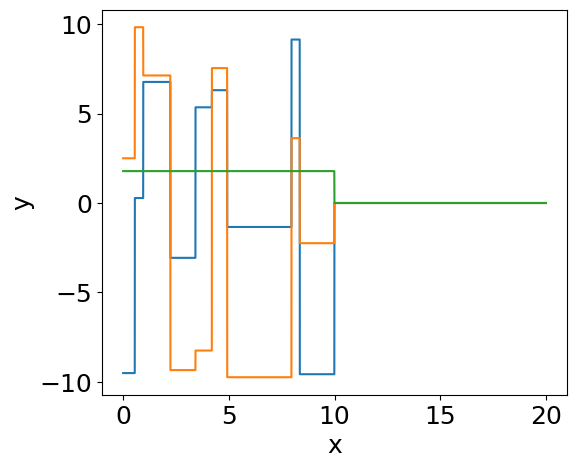

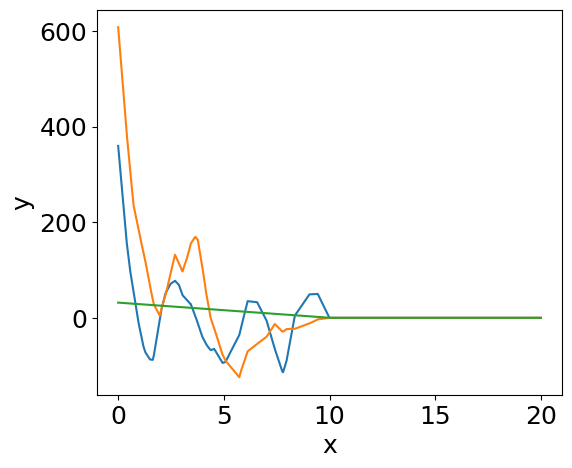

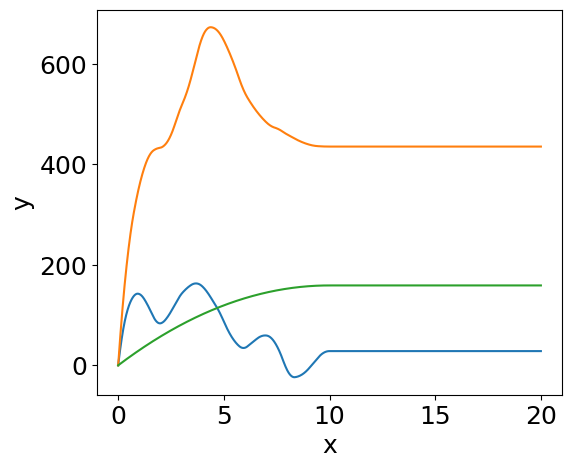

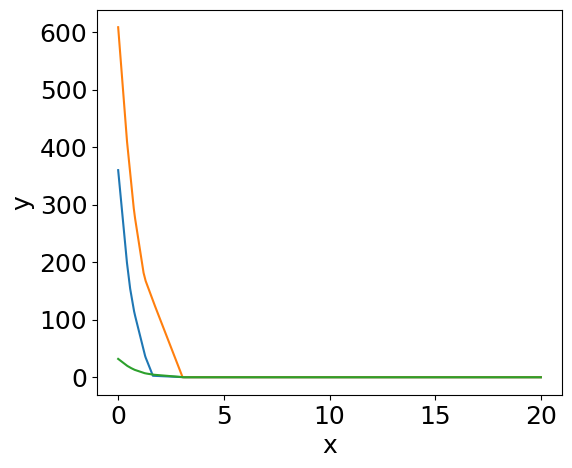

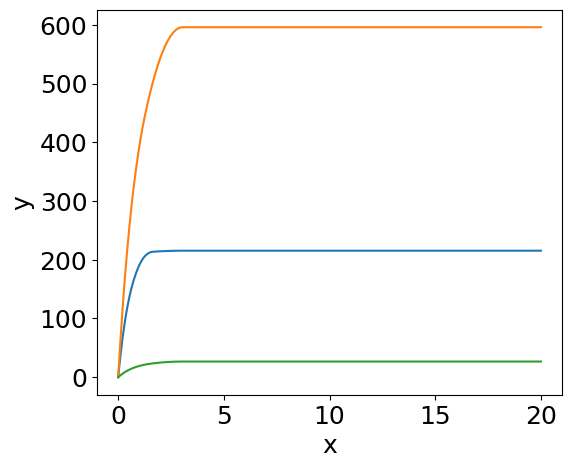

In [ ]:
import scipy

def Build_J_and_ACF(dir_list, dist_list, inputs, verbose=False):
    """
        Construct the heat current vs time from the sequence of legs of the
        phonon's journey and compute its ACF
    """
    tau_max, time_intervals, v_g = inputs['tau_max'], inputs['time_intervals'], inputs['v_g']

    dt = tau_max/float(time_intervals-1)
    t, J = np.linspace(0,tau_max,time_intervals), np.zeros([time_intervals,3])

    i1 = 0
    for i in range(dist_list.size):
        i0 = i1
        i1 = i0 + int(dist_list[i]/(dt*v_g))
        J[i0:i1,:] = np.matmul(v_g*np.ones([i1-i0,1]),dir_list[i].reshape([1,3]))

    A = ACF_FFT(tau_max, J)
    I = scipy.integrate.cumtrapz(A,t,axis=0,initial=0)
    if verbose: quickmultiplot([[t,J[:,i]] for i in range(3)])
    if verbose: quickmultiplot([[t,A[:,i]] for i in range(3)])
    if verbose: quickmultiplot([[t,I[:,i]] for i in range(3)])

    return t, J, A, I

def Build_J_and_ACF_If_Thermalizing(dir_list, dist_list, inputs, verbose=False):
    """
        Compute the sum of the analytic ACFs for each individual leg of the
        phonon's journey
    """
    tau_max, time_intervals, v_g = inputs['tau_max'], inputs['time_intervals'], inputs['v_g']

    dt = tau_max/float(time_intervals-1)
    t, A = np.linspace(0,tau_max,time_intervals), np.zeros([time_intervals,3])

    for i in range(dist_list.size):
        tau = dist_list[i]/v_g
        n = int(tau/dt)
        ramp = (v_g**2) * tau * (1.0 - np.arange(n)*dt/tau).reshape((n,1))
        A[:n,:] += np.matmul(ramp,(dir_list[i]**2).reshape((1,3)))

    I = scipy.integrate.cumtrapz(A,t,axis=0,initial=0)
    if verbose: quickmultiplot([[t,A[:,i]] for i in range(3)])
    if verbose: quickmultiplot([[t,I[:,i]] for i in range(3)])

    return t, A, I

#p = np.array([d,0.01,0])*0.25 # For debugging
#nv = RandomDirectionInHalfSpace(np.array([0,0,-1]))
#nv = normalize(np.array([-1,0.01,0])) # For debugging
p = np.array([inputs['d'],inputs['L'],0])*0.45 # For debugging
nv = normalize(np.array([-1,0.01,0])) # For debugging
while True:
    p = (np.random.rand(3)-0.5)*np.array([inputs['d'],inputs['L'],0])
    if np.linalg.norm(p) > inputs['r']: break
    print("In pore, generating new starting point")
nv = RandomDirectionInHalfSpace(np.array([0,0,1]))


#print(p)
#print(nv)

# #print(PathInCell(p,nv,walls,pillar))
#dir_list, dist_list, pos_list, wallindex = RayTrace(p,nv,inputs,100, verbose=False)
dir_list, dist_list, pos_list, wallindex = RayTrace(p,nv,inputs_staggered,100, verbose=False)
#quickplot(pos_list[:,0],pos_list[:,1])
t, J, A, I = Build_J_and_ACF(dir_list, dist_list, inputs_staggered, verbose=True)
t, A, I = Build_J_and_ACF_If_Thermalizing(dir_list, dist_list, inputs_staggered, verbose=True)

## Compute ACF from a single random phonon

One function that generates a random ray for the initial parameters:

In [ ]:
def RandomStartingPosition(latt_vec,r,verbose=False):
    while True:
        pd = (np.random.rand(3)-0.5); # Random position in direct coordinates)
        p = np.matmul(latt_vec,pd)
        if np.linalg.norm(p) > r:
            return p

def Test(inps):
    walls = inps['walls']
    latt_vec  = 2*np.array([walls[0,1],walls[1,1],[0,0,0]]).transpose() # lattice vectors (column wise)
    r = inps['r']
    print(r)
    print(latt_vec)
    p = np.array([RandomStartingPosition(latt_vec,r,verbose=False) for i in range(10000)])
    quickplot(p[:,0],p[:,1],plotstyle='o')

# Test(inputs)
# Test(inputs_staggered)

def GetRandomPhonon(inps,verbose=False):

    # unpack parameters
    walls, pillar = inps['walls'], inps['pillar']
    tau00, v_g, tau_max = inps['tau00'],inps['v_g'], inps['tau_max']
    d, L, r, k_bulk = inps['d'],inps['L'],inps['r'],inps['k_bulk']
    # Matrix of lattice vectors (column wise)
    latt_vec  = 2*np.array([walls[0,1],walls[1,1],[0,0,0]]).transpose()

    # Random lifetime, start position and direction
    tau = -tau00 * np.log(1 - np.random.random())
    p = RandomStartingPosition(latt_vec,r,verbose=verbose)
    nv = RandomDirectionInHalfSpace(np.array([0,0,1]))

    # Follow the ray
    dir_list, dist_list, pos_list, wallindex = RayTrace(p,nv,inps,v_g*tau,verbose=verbose)
    # Compute the ACF and its integral
    t, J, A, I = Build_J_and_ACF(dir_list, dist_list, inps,verbose=verbose)
    t, Ath, Ith = Build_J_and_ACF_If_Thermalizing(dir_list, dist_list, inps,verbose=verbose)
    return t, A, I, Ath, Ith

# GetRandomPhonon(inputs,verbose=True)
# GetRandomPhonon(inputs_staggered,verbose=True)


## Average over many phonons

In [ ]:
def averagePhonons(inps,verbose=False):

    nBlocks, SamplesPerBlock = inps['nBlocks'], inps['SamplesPerBlock']
    time_intervals, tau00 = inps['time_intervals'], inps['tau00']

    # Average over nBlock of samplesPerBlock
    ACF     = np.zeros([nBlocks, time_intervals,3])
    ACFth   = np.zeros([nBlocks, time_intervals,3])
    kappa   = np.zeros([nBlocks, time_intervals,3])
    kappath = np.zeros([nBlocks, time_intervals,3])

    for i in range(nBlocks):
        #print(i)
        for j in range(SamplesPerBlock):
            #print((i,j))
            t, A, I, Ath, Ith = GetRandomPhonon(inps,verbose=verbose)
            ACF[i]     += A
            ACFth[i]   += Ath
            kappa[i]   += I
            kappath[i] += Ith
    ACF     /= tau00*float(SamplesPerBlock)
    ACFth   /= tau00*float(SamplesPerBlock)
    kappa   /= tau00*float(SamplesPerBlock)
    kappath /= tau00*float(SamplesPerBlock)

    ACFm   = ACF.mean(axis=0)
    ACFe   = ACF.std(axis=0)/np.sqrt(float(nBlocks-1))
    ACFmth = ACFth.mean(axis=0)
    ACFeth = ACFth.std(axis=0)/np.sqrt(float(nBlocks-1))
    km     = kappa.mean(axis=0)
    ke     = kappa.std(axis=0)/np.sqrt(float(nBlocks-1))
    kmth   = kappath.mean(axis=0)
    keth   = kappath.std(axis=0)/np.sqrt(float(nBlocks-1))
    return t, ACFm, ACFe, km, ke, ACFmth, ACFeth, kmth, keth


# t, ACFm, ACFe, km, ke, ACFmth, ACFeth, kmth, keth = averagePhonons(inputs)
# quickmultierrplot([[t,ACFm[:,i],ACFe[:,i]] for i in range(3)])
# quickmultierrplot([[t,ACFmth[:,i],ACFeth[:,i]] for i in range(3)])
# quickmultierrplot([[t,km[:,i],ke[:,i]] for i in range(3)])
# quickmultierrplot([[t,kmth[:,i],keth[:,i]] for i in range(3)])

# t, ACFm, ACFe, km, ke = averagePhonons(inputs_staggered)
# quickmultierrplot([[t,ACFm[:,i],ACFe[:,i]] for i in range(3)])
# quickmultierrplot([[t,km[:,i],ke[:,i]] for i in range(3)])

#Mount Google Drive

All the files that are read and written in this notebook are in the shared doodle directory here:
https://drive.google.com/drive/folders/1OWkRaILxVrBJurf5K0wzlQvoOqtTKdBG?usp=sharing

To be able to acceess this directory once you have mounted drive you need to make sure it is linked to your google drive. To do this follow the link and then under the drop down menu of actions for the folder select "Add shortcut to Drive".

In [ ]:
import fileinput
from google.colab import drive
drive.mount('/content/drive/')

# Move to the shared working directory and list what is there
%cd /content/drive/MyDrive/Structure-Characterzation-Development/MC-Ray-Trace
!ls

Mounted at /content/drive/
/content/drive/MyDrive/Structure-Characterzation-Development/MC-Ray-Trace
data-test.txt	   s_slab_2-11.txt	 s_slab_2.txt		      s_wire-3x3.txt
kt_wire-21x21.txt  s_slab_2-31.txt	 s_slab.txt		      s_wire-spec-11x11.txt
k_wire-21x21.txt   s_slab_2_spec-11.txt  s_square_wire_3_spec-41.txt  s_wire.txt
k_wire-3x3.txt	   s_slab_2_spec-31.txt  s_wire-11x11.txt	      Wire-21x21
NewData		   s_slab_2_spec.txt	 s_wire-21x21.txt	      Wire-spec-41x41


# Run simulation and save

In [ ]:
# def WriteDataFile(outfile, v_g, tau_0_0, d, tau_max, alphas, data, uncertainty):
#     # Function to write a block of data as a big file
#     paramkey = 'Paramters: v_g='+str(v_g)+' tau_0_0='+str(tau_0_0)+' d='+str(d)+' tau_max='+str(tau_max)+' Kn='+str(v_g*tau_0_0/d)+'\n'
#     headkey = ("Time","data[0]","data[1]","data[...]","uncertainty[0]","uncertainty[1]","uncertainty[...]")
#     separator = ' '
#     with open(outfile, 'w') as writer:
#         writer.write(paramkey)
#         writer.write('alphas:'+separator+separator.join(map(str, alphas))+"\n")
#         writer.write(separator.join(headkey)+"\n")
#         time = np.linspace(0.0, tau_max, time_intervals)
#         for i in range(time_intervals):
#             writer.write(str(time[i])+separator+separator.join(map(str,data[:,i]))+separator+separator.join(map(str,uncertainty[:,i]))+"\n")

def WriteDataFile(outfile, inps, data, uncertainty):
    # Function to write a block of data as a big file
    v_g, tau00, k_bulk = inps['v_g'], inps['tau00'], inps['k_bulk']
    d, L, r  =  inps['d'], inps['L'], inps['r']
    tau_max, alpha, Kn = inps['tau_max'], 2*r/L, v_g*tau00/d
    SpecProb = inps['specularity_probability']
    ThermProb = inps['thermalization_probability']
    paramkey = 'Paramters: v_g='+str(v_g)+' tau00='+str(tau00)+' d='+str(d)+' L='+str(L)+' r='+str(r)+' SpecProb='+str(SpecProb)+' ThermProb='+str(ThermProb)+' alpha='+str(alpha)+' Kn='+str(Kn)+' tau_max='+str(tau_max)+' k_bulk='+str(k_bulk)+'\n'
    headkey = ("Time","data[0]","data[1]","data[...]",
               "uncertainty[0]","uncertainty[1]","uncertainty[...]")
    separator = ' '
    with open(outfile, 'w') as writer:
        writer.write(paramkey)
        writer.write(separator.join(headkey)+"\n")
        time_intervals = inps['time_intervals']
        time = np.linspace(0.0, tau_max, time_intervals)
        for i in range(time_intervals):
            line=str(time[i])+separator+separator.join(map(str,data[i,:]))+separator+separator.join(map(str,uncertainty[i,:]))+"\n"
            writer.write(line)

In [ ]:
# Model parameters
model_parameters = {# Material
                    'tau00' :  1.0,       # mean lifetime
                    'v_g'   :  1.0,       # Group velocity
                    # Geometry
                    'd'     : 54.3,       # x spacing between pores
                    'L'     : 13.03,      # y spacing between pores
                    'alpha' : 0.8335,     # Pore diameter spacing ratio
                    # Scattering behavior
                    'thermalization_probability' : 0.0,    # Probability that phonons thermalize when hitting a pore
                    'specularity_probability'    : 1.0}    # Probability that phonons scater specularly


sim_parameters = {# Simulation parameters
                  't_max'          : 20,       # maximum correlation time (as a factor of tau00) to compute the ACF out to
                  'time_intervals' : 10001,    # time interfals
                  'nBlocks'        : 40,
                  'SamplesPerBlock': 500}


In [ ]:
import os
layouts = ['aligned','staggered']
speculatities   = [0,1]
#thermalizations = [0,1]
lknlist = np.linspace(-2,2,100)
dir = '/content/drive/MyDrive/Structure-Characterzation-Development/MC-Ray-Trace/NewData/'
file_name_template = "data-with-and-without-thermalization-sp{:.1f}-lkn{:+.2f}-{:s}.txt"
for  sp in speculatities:
    for lo in layouts:
        count = 0
        for lkn in lknlist:
            count += 1
            print(count)
            filename = dir+file_name_template.format(sp,lkn,lo)
            # check if file exists
            if os.path.exists(filename): continue
            # set parameters
            v_g, d = model_parameters['v_g'], model_parameters['d']
            Kn = 10.0**lkn
            tau00 = d*Kn/v_g
            print("log Kn :",lkn,", Kn :",Kn," MFP :",v_g*tau00)
            #model_parameters['thermalization_probability']  = th
            model_parameters['specularity_probability']  = sp
            model_parameters['tau00']  = tau00
            run_inputs = set_up_parameters(model_parameters,sim_parameters,pore_arrangment=lo)
            for k in ('d','L','v_g','r','tau00','k_bulk','tau_max'): print(k,":",run_inputs[k])
            for k in ('thermalization_probability', 'specularity_probability'): print(k,":",run_inputs[k])
            print('Layout', lo)
            kb = run_inputs['k_bulk']
            # run
            #t, ACFm, ACFe, km, ke = averagePhonons(run_inputs)
            t, ACFm, ACFe, km, ke, ACFmth, ACFeth, kmth, keth = averagePhonons(run_inputs)
            # save
            data = np.hstack((ACFm,km,ACFmth,kmth))
            uncertainty = np.hstack((ACFe,ke,ACFeth,keth))
            WriteDataFile(filename, run_inputs, data, uncertainty)
            # plot
            plotdata = [[t/tau00,ACFm[:,i],ACFe[:,i]] for i in range(3)]
            for i in range(3):
                plotdata.append([t/tau00,ACFmth[:,i],ACFeth[:,i]])
            quickmultierrplot(plotdata,
                              xlab='Correlation time $\\tau/\\theta_o$',
                              ylab="HCACF (Arb. U.)",
                              savefile=False, filename="A-sp-00-th-00.png")
            plotdata = [[t/tau00,km[:,i]/kb,ke[:,i]/kb] for i in range(3)]
            for i in range(3):
                plotdata.append([t/tau00,kmth[:,i]/kb,keth[:,i]/kb])
            quickmultierrplot(plotdata,
                              xlab='Correlation time $\\tau/\\theta_o$',
                              ylab="Cumulative cond. $\\kappa(\\tau)/\kappa_{bulk}$",
                              savefile=False, filename="K-sp-00-th-00.png")

# OLD

In [ ]:
def WriteDataFile(outfile, v_g, tau_0_0, d, tau_max, alphas, data, uncertainty):
    # Function to write a block of data as a big file
    paramkey = 'Paramters: v_g='+str(v_g)+' tau_0_0='+str(tau_0_0)+' d='+str(d)+' tau_max='+str(tau_max)+' Kn='+str(v_g*tau_0_0/d)+'\n'
    headkey = ("Time","data[0]","data[1]","data[...]","uncertainty[0]","uncertainty[1]","uncertainty[...]")
    separator = ' '
    with open(outfile, 'w') as writer:
        writer.write(paramkey)
        writer.write('alphas:'+separator+separator.join(map(str, alphas))+"\n")
        writer.write(separator.join(headkey)+"\n")
        time = np.linspace(0.0, tau_max, time_intervals)
        for i in range(time_intervals):
            writer.write(str(time[i])+separator+separator.join(map(str,data[:,i]))+separator+separator.join(map(str,uncertainty[:,i]))+"\n")

In [ ]:
def WriteDataFile(outfile, inps, data, uncertainty):
    # Function to write a block of data as a big file
    paramkey = inps
    #paramkey = 'Paramters: v_g='+str(v_g)+' tau_0_0='+str(tau_0_0)+' d='+str(d)+' tau_max='+str(tau_max)+' Kn='+str(v_g*tau_0_0/d)+'\n'
    headkey = ("Time","data[0]","data[1]","data[...]","uncertainty[0]","uncertainty[1]","uncertainty[...]")
    separator = ' '
    with open(outfile, 'w') as writer:
        writer.write(paramkey)
        writer.write('alphas:'+separator+separator.join(map(str, alphas))+"\n")
        writer.write(separator.join(headkey)+"\n")
        time = np.linspace(0.0, tau_max, time_intervals)
        for i in range(time_intervals):
            writer.write(str(time[i])+separator+separator.join(map(str,data[:,i]))+separator+separator.join(map(str,uncertainty[:,i]))+"\n")

In [ ]:
model_parameters['thermalization_probability']  = 0
model_parameters['specularity_probability']  = 0
model_parameters['alpha']  = 0.0
model_parameters['tau00']  = 1.0
inputs = set_up_parameters(model_parameters,sim_parameters)
#print(inputs)
for k in ('d','L','v_g','r','tau00','k_bulk'): print(k,inputs[k])
for k in ('thermalization_probability', 'specularity_probability'): print(k,inputs[k])
kb = inputs['k_bulk']

t, ACFm, ACFe, km, ke = averagePhonons(inputs)
quickmultierrplot([[t,ACFm[:,i],ACFe[:,i]] for i in range(3)],
                  xlab='Correlation time $\\tau/\\theta_o$',
                  ylab="HCACF (Arb. U.)",
                  savefile=True, filename="A-sp-00-th-00.png")
quickmultierrplot([[t,km[:,i]/kb,ke[:,i]/kb] for i in range(3)],
                  xlab='Correlation time $\\tau/\\theta_o$',
                  ylab="Cumulative cond. $\\kappa(\\tau)/\kappa_{bulk}$",
                  savefile=True, filename="K-sp-00-th-00.png")

#WriteDataFile

In [ ]:
model_parameters['thermalization_probability']  = 1.0
model_parameters['specularity_probability']  = 0.0
model_parameters['alpha']  = 0.0
model_parameters['tau00']  = 1.0
sim_parameters['nSamplesPerBlock']  = 100
inputs = set_up_parameters(model_parameters,sim_parameters)
#print(inputs)
for k in ('d','L','v_g','r','tau00','k_bulk'): print(k,inputs[k])
for k in ('thermalization_probability', 'specularity_probability'): print(k,inputs[k])
kb = inputs['k_bulk']
t, ACFm, ACFe, km, ke = averagePhonons(inputs)
quickmultierrplot([[t,ACFm[:,i],ACFe[:,i]] for i in range(3)],
                  xlab='Correlation time $\\tau/\\theta_o$',
                  ylab="HCACF (Arb. U.)",
                  savefile=True, filename="A-sp-00-th-10.png")
quickmultierrplot([[t,km[:,i]/kb,ke[:,i]/kb] for i in range(3)],
                  xlab='Correlation time $\\tau/\\theta_o$',
                  ylab="Cumulative cond. $\\kappa(\\tau)/\kappa_{bulk}$",
                  savefile=True, filename="K-sp-00-th-10.png")

In [ ]:
model_parameters['thermalization_probability']  = 0
model_parameters['specularity_probability']  = 0
model_parameters['alpha']  = 0.75
model_parameters['tau00']  = 1.0
sim_parameters['nSamplesPerBlock']  = 100
inputs = set_up_parameters(model_parameters,sim_parameters)
#print(inputs)
for k in ('d','L','v_g','r','tau00','k_bulk'): print(k,inputs[k])
for k in ('thermalization_probability', 'specularity_probability'): print(k,inputs[k])
kb = inputs['k_bulk']
t, ACFm, ACFe, km, ke = averagePhonons(inputs)
quickmultierrplot([[t,ACFm[:,i],ACFe[:,i]] for i in range(3)])
quickmultierrplot([[t,km[:,i]/kb,ke[:,i]/kb] for i in range(3)])

In [ ]:
model_parameters['thermalization_probability']  = 0
model_parameters['specularity_probability']  = 1.0
model_parameters['alpha']  = 0.75
model_parameters['tau00']  = 1.0
sim_parameters['nSamplesPerBlock']  = 100
inputs = set_up_parameters(model_parameters,sim_parameters)
#print(inputs)
for k in ('d','L','v_g','r','tau00','k_bulk'): print(k,inputs[k])
for k in ('thermalization_probability', 'specularity_probability'): print(k,inputs[k])
kb = inputs['k_bulk']
t, ACFm, ACFe, km, ke = averagePhonons(inputs)
quickmultierrplot([[t,ACFm[:,i],ACFe[:,i]] for i in range(3)])
quickmultierrplot([[t,km[:,i]/kb,ke[:,i]/kb] for i in range(3)])

In [ ]:
model_parameters['thermalization_probability']  = 1.0
model_parameters['specularity_probability']  = 0
model_parameters['alpha']  = 0.75
model_parameters['tau00']  = 1.0
sim_parameters['nSamplesPerBlock']  = 100
inputs = set_up_parameters(model_parameters,sim_parameters)
#print(inputs)
for k in ('d','L','v_g','r','tau00','k_bulk'): print(k,inputs[k])
for k in ('thermalization_probability', 'specularity_probability'): print(k,inputs[k])
kb = inputs['k_bulk']
t, ACFm, ACFe, km, ke = averagePhonons(inputs)
quickmultierrplot([[t,ACFm[:,i],ACFe[:,i]] for i in range(3)])
quickmultierrplot([[t,km[:,i]/kb,ke[:,i]/kb] for i in range(3)])

In [ ]:
model_parameters['thermalization_probability']  = 1.0
model_parameters['specularity_probability']  = 1.0
model_parameters['alpha']  = 0.75
model_parameters['tau00']  = 1.0
sim_parameters['nSamplesPerBlock']  = 100
inputs = set_up_parameters(model_parameters,sim_parameters)
#print(inputs)
for k in ('d','L','v_g','r','tau00','k_bulk'): print(k,inputs[k])
for k in ('thermalization_probability', 'specularity_probability'): print(k,inputs[k])
kb = inputs['k_bulk']
t, ACFm, ACFe, km, ke = averagePhonons(inputs)
quickmultierrplot([[t,ACFm[:,i],ACFe[:,i]] for i in range(3)],
                  xlab='Correlation time $\\tau/\\theta_o$',
                  ylab="HCACF (Arb. U.)",
                  savefile=True, filename="A-sp-05-th-05.png")
quickmultierrplot([[t,km[:,i]/kb,ke[:,i]/kb] for i in range(3)],
                  xlab='Correlation time $\\tau/\\theta_o$',
                  ylab="Cumulative cond. $\\kappa(\\tau)/\kappa_{bulk}$",
                  savefile=True, filename="K-sp-10-th-10.png")

In [ ]:
model_parameters['thermalization_probability']  = 0.5
model_parameters['specularity_probability']  = 0.5
model_parameters['alpha']  = 0.75
model_parameters['tau00']  = 1.0
sim_parameters['nSamplesPerBlock']  = 100
inputs = set_up_parameters(model_parameters,sim_parameters)
#print(inputs)
for k in ('d','L','v_g','r','tau00','k_bulk'): print(k,inputs[k])
for k in ('thermalization_probability', 'specularity_probability'): print(k,inputs[k])
kb = inputs['k_bulk']
t, ACFm, ACFe, km, ke = averagePhonons(inputs)
quickmultierrplot([[t,ACFm[:,i],ACFe[:,i]] for i in range(3)],
                  xlab='Correlation time $\\tau/\\theta_o$',
                  ylab="HCACF (Arb. U.)",
                  savefile=True, filename="A-sp-05-th-05.png")
quickmultierrplot([[t,km[:,i]/kb,ke[:,i]/kb] for i in range(3)],
                  xlab='Correlation time $\\tau/\\theta_o$',
                  ylab="Cumulative cond. $\\kappa(\\tau)/\kappa_{bulk}$",
                  savefile=True, filename="K-sp-05-th-05.png")

In [ ]:
quickmultierrplot([[t,ACFm[:,i],ACFe[:,i]] for i in range(3)])
quickmultierrplot([[t,km[:,i],ke[:,i]] for i in range(3)])

In [ ]:
def WriteDataFile(outfile, v_g, tau_0_0, d, tau_max, alphas, data, uncertainty):
    # Function to write a block of data as a big file
    paramkey = 'Paramters: v_g='+str(v_g)+' tau_0_0='+str(tau_0_0)+' d='+str(d)+' tau_max='+str(tau_max)+' Kn='+str(v_g*tau_0_0/d)+'\n'
    headkey = ("Time","data[0]","data[1]","data[...]","uncertainty[0]","uncertainty[1]","uncertainty[...]")
    separator = ' '
    with open(outfile, 'w') as writer:
        writer.write(paramkey)
        writer.write('alphas:'+separator+separator.join(map(str, alphas))+"\n")
        writer.write(separator.join(headkey)+"\n")
        time = np.linspace(0.0, tau_max, time_intervals)
        for i in range(time_intervals):
            writer.write(str(time[i])+separator+separator.join(map(str,data[:,i]))+separator+separator.join(map(str,uncertainty[:,i]))+"\n")

In [ ]:
tmp = np.arange(10)
print(tmp)
print(tmp[0:1])
print(np.ones([i1-i0,1]).shape)
print(dir_list[0].shape)
print(np.matmul(np.ones([i1-i0,1]),dir_list[i].reshape([1,3])))
#print(np.matmul(np.ones(i1-i0),dir_list[i]))

In [ ]:
#p  = RandomPositionInBox()
p = np.array([d,L,0])*0.25 # For debugging
#nv = RandomDirectionInHalfSpace(np.array([0,0,-1]))
nv = normalize(np.array([1,1,0])) # For debugging
print(p)
print(nv)
#print(PathInCell(p,nv,walls,pillar))
max_dist = 10.0
dir_list, dist_list, pos_list, wallindex = RayTrace(p,nv,walls,pillar,max_dist,verbose=True)
#print("Leg directions:",dir_list)
print("Leg distances:",dist_list)
#print(pos_list)
#print("Wallindex:",wallindex)

quickplot(pos_list[:,0],pos_list[:,1])

Compute the Heat flux and its ACF

#Old: Light in pillars

## Function to trace ray in a single cell

Define a function that folows the flight of a ray in a cell untill it hits the walls or it hits the pillar

In [ ]:
def PathInCell(p,nv,walls,pillar,path):
    """
       Follow a ray in a cell starting from point p traveling in direction nv
       untill it eaither exits the cell or hits an object (the pillar) within
       the cell.

       input:
              p         : starting position
              nv        : ray direction
              walls     : list of pairs of normal vector and reference positions
                          used to define each of the walls that bound the cell
              pillar    : parameters needed to describe the pillar
       out:
              pn        : New position after flighht in cell
              wallindex : random vector (numpy array)
    """

    # Find the distance along the ray to all the walls
    hit_dist = [WallDistance(p,nv,wp,wn) for wn,wp in walls]
    #print(p,nv)
    # Determine if the ray hits the pillar and append the distance to the
    # pillar to the list of wall distances
    dist = DistanceToPillar(p,nv,pillar)
    if dist == 1:
        #fig = plt.figure()
        #ax = fig.add_subplot(111,projection = '3d')
        #path = np.array(path)
        #print(path)
        #plt.plot(path[:,0],path[:,1],path[:,2],'ko-')
        input("Press enter to continue")
        #quit()
    elif dist != -1:
        hit_dist.append(dist)
    #print(hit_dist)
    epsilon = 1e-10
    # Find the shortest positive distance to hit something --
    # and then retrun the index of the wall this corresponds to.
    wallindex = IndexOfSmallestPositiveValue(hit_dist,epsilon)
    #print("Ray hits Wall "+ str(int(wallindex)))

    # Determine the position that that the ray strikes the wall
    pn = p + hit_dist[wallindex]*nv

    return pn, wallindex

# Test


#p  = RandomPositionInBox()
#p = np.array([d,L,0])*0.5 # For debugging
#nv = RandomDirectionInHalfSpace(np.array([0,0,-1]))
#print(p)
#print(nv)
#print(PathInCell(p,nv,walls,pillar))


# Function to trace full ray trajectory

Define a function that traces the trajectory of a ray through multiple cells and scattering events untill it is absorbed or lost through the top of the box.
Each time a ray hits a wall it can do one of four things:

1.   Stop (be adsorbed, or lost)
2.   Pass through unhindered
3.   Scatter diffusely
4.   Scatter speculalrly

There is s probability for each


In [ ]:
def Transmit(nv):
    """
       Return the new direction and position of the ray after it is transmitted
       point that is transmitted
    """
    return nv

def Adsorb(nv):
    """
       Return the new direction and position of the ray after it is transmitted
       point that is transmitted
    """
    return nv

def Spec_reflect(nv,wallnormal):
    """
       Return the new direction and position of the ray after it is transmitted
       point that is transmitted
    """
    nnv = nv - 2*np.dot(wallnormal,nv)*wallnormal
    return nnv

def Diff_reflect(nv,wallnormal):
    """
       Return the new direction and position of the ray after it is transmitted
       point that is transmitted
    """
    nnv = RandomDirectionInHalfSpace(wallnormal)
    return nnv

def WallEvent(p,nv,wallnormal,cumulative_probabilities):
    """
       Decide what happens at a wall: The ray can either be:
        * Transmitted with its direction unchanged, but the ray point shifted
        * Adsorbed with the ray tracing stopped
        * Scattered specularly
        * Scattered diffusely
        Follow a ray through a sequesnce of cells and scattering events starting
       from point p traveling in direction nv untill some stopping condition is
       reached. Return the list of cell locations at which the ray changed
       direction, and their corresponding wall index.

       input:
              po        : ray starting position
              nvo       : ray direction
              walls     : list of pairs of normal vector and reference positions
                          used to define each of the walls that bound the cell
              pillar    : parameters needed to describe the pillar
       out:
              plist     : List of positions where scattering occured
              wallindex : coreesponding wallindex for these events
    """

    dice = np.random.rand()
    #print(dice)
    event = 0
    while dice > cumulative_probabilities[event]:
      #print(dice)
      #print(cumulative_probabilities[event])
      #print(event)
      event += 1
    #print(event)

    # Switch between cases:
    #switcher = {
        #0: Transmit(nv),                    # Event 0: transmission
        #1: Adsorb(nv),                      # Event 1: absorbtion
       # 2: Spec_reflect(nv,wallnormal),     # Event 2: specular reflection
       # 3: Diff_reflect(nv,wallnormal),     # Event 3: diffuse reflection
    #}
    #nnv = switcher.get(event, "nothing")
    if event == 0:
        nnv = Transmit(nv)
    elif event == 1:
        nnv = Adsorb(nv)
    elif event == 2:
        nnv = Spec_reflect(nv,wallnormal)
    else:
        nnv = Diff_reflect(nv,wallnormal)
    return event, nnv

#print(p)
#print(nv)
#print(walls)
#wallindex = 4
#wallnormal = walls[wallindex][0]
#probabilities = cumulative_probabilities[wallindex]

#WallEvent(p,nv,wallnormal,probabilities)

In [ ]:
def ACF_FFT(t_max, J):
    # Compute the autocorrelation of the instantaniouse flux vector
    nd = J.shape
    time_intervals = nd[1]
    c = np.zeros([3,time_intervals*2])
    zpad = np.zeros(time_intervals)
    sf = t_max/float(time_intervals)
    for j in range(3):
        dft  = np.fft.fft(np.concatenate((J[j],zpad)))
        c[j] = np.fft.ifft(dft*np.conjugate(dft))*sf
    return c[:,:time_intervals]

In [ ]:
normalize = lambda vector: vector/(np.linalg.norm(vector))

def PillarNormalAtPoint(p,co,PitchAngle):
    """
    Returns the normal direction on the surface of the cone at position p
    """
    conevector = p - co
    normcone = np.linalg.norm(conevector[0:2])
    cone_z = normcone*np.tan(PitchAngle)
    wallnormal = np.array([np.sin(np.pi/2 - PitchAngle)*(conevector[0]/normcone),
                           np.sin(np.pi/2 - PitchAngle)*(conevector[1]/normcone),
                           np.cos(np.pi/2 - PitchAngle)])
    return wallnormal

In [ ]:
normalize = lambda vector: vector/(np.linalg.norm(vector))

def PillarNormalAtPoint(p,co,PitchAngle):
    """
    Returns the normal direction on the surface of the cone at position p
    """
    conevector = p - co
    normcone = np.linalg.norm(conevector[0:2])
    cone_z = normcone*np.tan(PitchAngle)
    wallnormal = np.array([np.sin(np.pi/2 - PitchAngle)*(conevector[0]/normcone),
                           np.sin(np.pi/2 - PitchAngle)*(conevector[1]/normcone),
                           np.cos(np.pi/2 - PitchAngle)])
    return wallnormal

def RayTrace(po,nvo,walls,pillar):
    """
       Follow a ray through a sequesnce of cells and scattering events starting
       from point p traveling in direction nv untill some stopping condition is
       reached. Return the list of cell locations at which the ray changed
       direction, and their corresponding wall index.

       input:
              po        : ray starting position
              nvo       : ray direction
              walls     : list of pairs of normal vector and reference positions
                          used to define each of the walls that bound the cell
              pillar    : parameters needed to describe the pillar
       out:
              plist     : List of positions where scattering occured
              wallindex : coreesponding wallindex for these events
    """
    p,nv1 = po,nvo # p is the initial starting point in the cell refference frame

    nwalls = walls.shape[0] # number of walls
    max_cells = 500                # Max number of itterations
    step = 0
    distance = 0
    accum_shift = np.zeros(3)      # vector from starting point to current point
                                   # as the crow flies

    # Initialize path and event recording
    path   = [p]
    events = [[5,6]] # Event 5 (birth) at wall 6 (the top) Only record events
                     # where the ray changes direction.
    while step < max_cells:
        #print(step)
        step += 1
        # Flight leg
        pnew,wallindex = PathInCell(p,nv1,walls,pillar,path)
        #plt.plot([pnew[0]],[pnew[1]],[pnew[2]])
        #crow_vector += pnew-p

        # Scatter
        # If the ray hits the pillar we need to compute the normal vector at the
        # point on the surface of the pillar where the ray hit
        if wallindex >= nwalls:
            wallnormal = PillarNormalAtPoint(p,co,PitchAngle)
            cellshift  = np.zeros(3)
        else:
            wallnormal = walls[wallindex,0]
            cellshift  = -2*walls[wallindex,1]

        probabilities = cumulative_probabilities[wallindex]
        scatterindex,nnv = WallEvent(p,nv1,wallnormal,probabilities)
        #print("Scatterindex: "+str(int(scatterindex)))
        # Set up new flight leg

        if scatterindex == 0:
            # If wallindex is for an external wall and the scatterindex is for
            # transmit then the ray goes into the next cell over. In which case
            # shift p for this cell, and then go onto the next leg
            #path.append(pnew)
#            crow_vector += pnew-p
#            print("pnew: ",pnew)
#            print("crow_vector: ",crow_vector)
#            print("p: ",p)
            p = pnew + cellshift
            accum_shift -= cellshift
            path.append(p+accum_shift)

        else:
            # If wall index is for scattering then we continue in the current cell
            # picking up a new leg starting from np and heading in the new direvtion
            # nnv. In this case record the event, opdate nv and go onto the new leg.
#            crow_vector += pnew-p
#            path.append(crow_vector)
            p = pnew
           # print(p)
            path.append(p+accum_shift)
            nv1 = nnv
            events.append([scatterindex,wallindex])
            ptest = np.array(p)
            #print(ptest)
            if scatterindex==1:
                # If scatterindex is for adsorb record the event and then stop.
                return path,events,wallindex
#        print(path)
#        p1 = np.array(path)
#        plt.plot(p1[:,0],p1[:,1],p1[:,2])

    return path,events,wallindex


In [ ]:
walls

array([[[  -1.,    0.,    0.],
        [  14.,    0.,    0.]],

       [[   0.,   -1.,    0.],
        [   0.,   14.,    0.]],

       [[   1.,    0.,    0.],
        [ -14.,    0.,    0.]],

       [[   0.,    1.,    0.],
        [   0.,  -14.,    0.]],

       [[   0.,    0.,    1.],
        [   0.,    0., -200.]],

       [[   0.,    0.,   -1.],
        [   0.,    0.,    0.]]])

In [ ]:
pillar

[array([0., 0., 0.]), array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 0.]])]

In [ ]:
path,events,wallindex = RayTrace(po,nvo,walls,pillar)

In [ ]:
from numpy.core.function_base import linspace
tmax = 10.0
nt = 1001
t = np.linspace(0,tmax,nt)
J = np.zeros([nt,3])
J = v = 1.0
path


[array([9.97358829, 8.00454242, 0.        ]),
 array([ -1.75216904, -14.        , -17.70221793]),
 array([-14.        , -36.98426517, -36.19260338]),
 array([-16.67277948, -42.        , -40.22766257]),
 array([-23.26975615, -54.37987866, -50.18702941])]

Run a simulation

In [ ]:
pillarabs = []
groundabs = []
outofbox = []
heights = np.linspace(10,200,20)
for h in heights:
  d = 14   # Length of the cell in x
  L = 14   # Length in y
  #h = 50   # Depth of the box in z. We assume all rays start at the z = zero
            # plane and head in the negative z direction
  RadiusAtTop = 5  # Radius of cylinder or cone at its top
  PitchAngle  = 0.0*np.pi/180.0   # If 0 = cylinder

  # vectors for cone equation
  co = np.array([0.0,0.0,0.0]) # Cone apex
  cm = np.identity(3)          # Cone matrix
  if PitchAngle == 0:
    # Cylinder
    r = RadiusAtTop
    s = 0.0
  else:
    # Cone
    r = 0.0
    s = -(np.tan(PitchAngle))**2
    cone_height = RadiusAtTop/(np.tan(PitchAngle)) # Cone Height
    co[2] = cone_height # Center

  cm[2,2] = s

  # Define the pillar parameters and walls of the cell

  pillar = [co,cm]
  walls  = [[[ -1, 0, 0],[ d, 0, 0]],
          [[ 0, -1, 0],[ 0, L, 0]],
          [[1, 0, 0],[-d, 0, 0]],
          [[ 0,1, 0],[ 0,-L, 0]],
          [[ 0, 0,1],[ 0, 0,-h]],
          [[ 0, 0, -1],[ 0, 0, 0]]]
  walls = np.array(walls)

  wall_transmission_prob_list = [1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0]
  wall_absorbtion_prob_list   = [0.0, 0.0, 0.0, 0.0, 0.8, 1.0, 0.8]
  wall_specularity__list      = [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0]

  cumulative_probabilities = []

  for i in range(len(wall_specularity__list)):
      p_tran = wall_transmission_prob_list[i]
      p_abs   = wall_absorbtion_prob_list[i]
      spec  = wall_specularity__list[i]
      cumulative_probabilities.append(GetCumProbs(p_tran,spec,p_abs))

  cumulative_probabilities = np.array(cumulative_probabilities)

  hit_count = np.array([0,0,0])
  # 0th index: Absorbed by pillar
  # 1st index: Absorbed by ground
  # 2nd index: Leaves out of top
  wallindex_position_list = []
  last_positions_list = []

  zs = []
  for i in range(100000):
      #print(i)
    x = np.random.uniform(-d,d)
    y = np.random.uniform(-L,L)
    z = 0
    #po = np.array([0.5,0.25,0.0])
    po = np.array([x,y,z])
    if x >= -RadiusAtTop and x <= RadiusAtTop and y >= -RadiusAtTop and y <= RadiusAtTop:
      InCone = True
      while InCone:
          x = np.random.uniform(-d,d)
          y = np.random.uniform(-L,L)
          z = 0
          #po = np.array([0.5,0.25,0.0])
          po = np.array([x,y,z])
          if x < -RadiusAtTop or x > RadiusAtTop or y < -RadiusAtTop or y > RadiusAtTop:
              InCone = False
    nvo = RandomDirectionInHalfSpace([0,0,-1])
    nvo = normalize(nvo)
    path,events,wallindex = RayTrace(po,nvo,walls,pillar)
    path = np.array(path)
    if wallindex == 6:
      hit_count[0] += 1
    elif wallindex == 4:
      hit_count[1] += 1
    elif wallindex == 5:
      hit_count[2] += 1

    #print(path[-1,:])
    last_positions_list.append([path[-1,0],path[-1,1],path[-1,2]])
    wallindex_position_list.append([wallindex,path[-1,0],path[-1,1],path[-1,2]])
    zs.append(path[-1,2])
  #print("Absorbed by pillar",hit_count[0],"times")
  #print("Absorbed by ground",hit_count[1],"times")
  #print("Leaves top of the box",hit_count[2],"times")
  pillarabs.append(hit_count[0]/100000)
  groundabs.append(hit_count[1]/100000)
  outofbox.append(hit_count[2]/100000)

#np.savetxt("Cylinder-Depth50.txt",wallindex_position_list)
#np.savetxt("Cylinder-Depth50-WallHeight.txt",wallindex_position_list)
#np.savetxt("Cone-Depth50-Angle15.txt",wallindex_position_list)

np.savetxt("Cylinder-Pillar.txt",pillarabs)
np.savetxt("Cylinder-Ground.txt",groundabs)
np.savetxt("Cylinder-LeavesBox.txt",outofbox)

    #print(path)
    #print(events)

#fig = plt.figure()
#ax = fig.add_subplot(111)
#ax.plot(heights,pillarabs,heights,groundabs,heights,outofbox)
#last_positions_list = np.array(last_positions_list)
#plt.plot(last_positions_list[:,0],last_positions_list[:,1],last_positions_list[:,2],'ko')
#Plot_Data_Distribution(zs)
#Plot_Data_Distribution(zs,bw_method=)

[Text(0, 0.5, 'Fraction'),
 Text(0.5, 0, 'Depth of Box'),
 Text(0.5, 1.0, 'Fraction vs Box Depth at 4.0 degree pitch')]

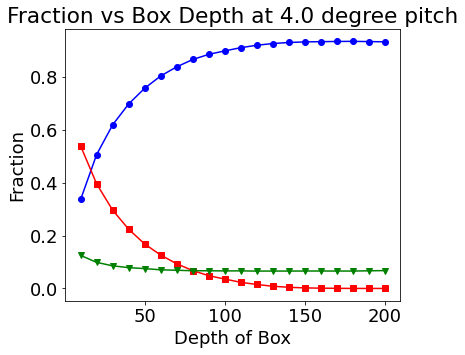

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
line1 = ax.plot(heights,pillarabs,'bo-')
line2 = ax.plot(heights,groundabs,'rs-')
line3 = ax.plot(heights,outofbox,'gv-')
ax.set(xlabel="Depth of Box",ylabel="Fraction",title = "Fraction vs Box Depth at "+str(PitchAngle*180/np.pi)+" degree pitch")


In [ ]:
max(pillarabs)

0.93406

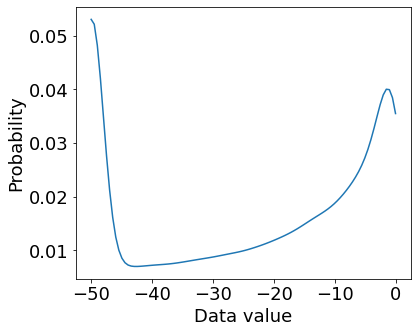

In [ ]:
Plot_Data_Distribution(zs,bw_method=0.1)

In [ ]:
def Plot_Data_Distribution(data,bw_method=None,**kwargs):
    # make a probability distribution function of the data
    from scipy.stats.kde import gaussian_kde

    # this create the kernel, given an array it will estimate the probability over that values
    kde = gaussian_kde(data,bw_method=bw_method)
    # these are the values over wich your kernel will be evaluated
    dist_space = np.linspace(min(data), max(data), 100)
    # plot the results
    quickplot(dist_space,kde(dist_space),"Data value","Probability",'-')



[[ -9.87947207   0.97793341   0.        ]
 [-13.94413528 -14.         -15.81727452]
 [-14.         -14.20585668 -16.0346671 ]
 [-21.54268488 -42.         -45.38635287]
 [-22.72828242 -46.36882469 -50.        ]]
[[5, 6], [1, 4]]


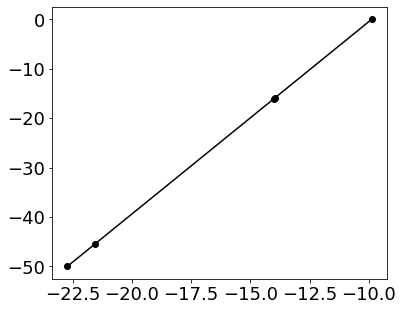

In [ ]:
print(path)
path = np.array(path)
plt.plot(path[:,0],path[:,2],"ko-")
print(events)

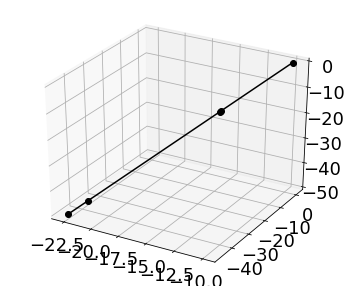

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
path = np.array(path)
plt.plot(path[:,0],path[:,1],path[:,2],"ko-")

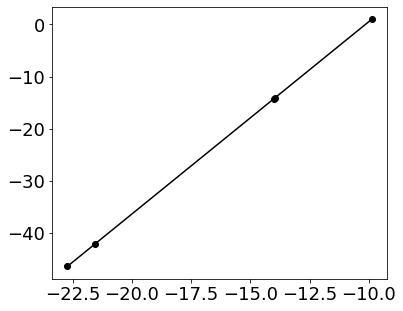

In [ ]:
path = np.array(path)
plt.plot(path[:,0],path[:,1],"ko-")

In [ ]:
print(po)

[0.5  0.25 0.  ]


In [ ]:
print(Spec_reflect(np.array([1,1,-1]),np.array([0,0,-2])))
print(Diff_reflect(np.array([0,0,1]),np.array([0,0,1])))

[1 1 7]
[0.32478517 0.34316561 0.88133532]


Function for computing the ACF of a vector quantity

In [ ]:
def ACF(t_max, J):
    # Compute the autocorrelation of the instantaniouse flux vector
    nd = J.shape
    time_intervals = nd[1]
    c = np.zeros([3,time_intervals*2])
    zpad = np.zeros(time_intervals)
    sf = t_max/float(time_intervals)
    for j in range(3):
        dft  = np.fft.fft(np.concatenate((J[j],zpad)))
        c[j] = np.fft.ifft(dft*np.conjugate(dft))*sf
    return c[:,:time_intervals]

Define a function that simulates a large number of rays and collects the ray impact data.

# Plotting functions

> Indented block

> Indented block





Set plot formatting style and define some plotting functions

In [ ]:
# Define plotting functions

plt.rc("font", size = 18, family = 'sans-serif')
plt.rcParams["figure.figsize"] = (6, 5)
plt.rcParams['animation.html'] = 'html5'

def quickplot(x,y,xlab,ylab,plotstyle):
    """
       Display a formatted plot of a single set of data

       input: x = x values
              y = y values
              e = uncertainty values
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x,y,plotstyle)
    ax.set(xlabel=xlab, ylabel=ylab)
    plt.show()

def quickploterr(x,y,e,col='',xlab="x",ylab="y",plotlab=""):
    """
       Display a formatted error bar plot of a single set of data

       input: x = x values
              y = y values
              e = uncertainty values
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x,y,'-'+col)
    ax.fill_between(x,y-e,y+e,alpha=0.2)
    ax.set(title=plotlab,xlabel=xlab, ylabel=ylab)
    #plt.savefig('test.pdf')
    plt.show()

def quickmultiplot(data,xlab="x",ylab="y",plotlab=""):
    """
       Display a formatted plot of multiple sets of data

       input: data = List of data sets for plotting with each data set composed
                     of 2 equal length vectors containing the x and y data
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for x,y in data:
        ax.plot(x,y,'-')
        ax.set(title=plotlab,xlabel=xlab, ylabel=ylab)
    plt.show()

def quickmultierrplot(data,xlab="x",ylab="y",plotlab=""):
    """
       Display a formatted error bar plot of multiple sets of data

       input: data = List of data sets for plotting with each data set composed
                     of 3 equal length vectors containing the x, y and uncertainty data
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for x,y,e in data:
        ax.plot(x,y,'-')
        ax.fill_between(x,y-e,y+e,alpha=0.2)
        ax.set(title=plotlab,xlabel=xlab, ylabel=ylab)
    plt.show()